In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchsummary import summary

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#!pip install torchsummary

In [3]:
torch.cuda.is_available()

False

In [4]:
torch.backends.mps.is_available()

True

In [5]:
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
    
print(f'Using device: {device}')

Using device: mps


In [42]:
# Generate a classification problem with 2 informative features
X, y = make_blobs(n_samples=300, centers=5)

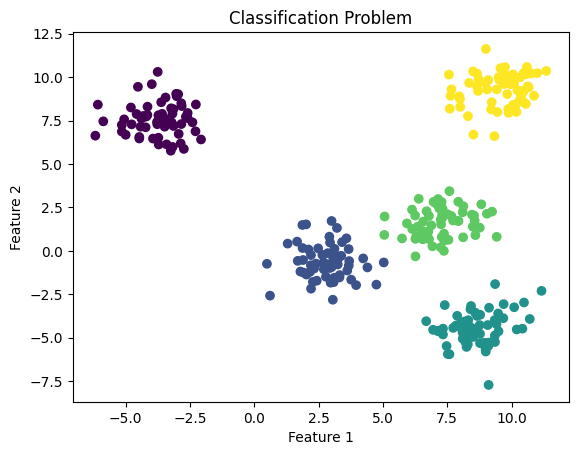

In [43]:
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Problem')
plt.show()

In [44]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

In [45]:
# Create Simple Model

class MyModel(nn.Module): # Name the class
    
    def __init__(self, input_feature, output_feature): # Constructor
        super(MyModel, self).__init__() # Ignore this
        
        # Feeding forward layers
        self.fc1 = nn.Linear(input_feature, 100) # Layer 1 (input)
        self.fc2 = nn.Linear(100, 100) # Layer 2
        self.fc3 = nn.Linear(100, output_feature)  # Layer 3 (output)
        
        # Intermidiate layers
        self.relu = nn.ReLU()  # Activation function
        self.softmax = nn.Softmax() # Output function


    def forward(self, x): # Define how the model forwarding
        
        x = self.fc1(x) # input to layer 1
        x = self.relu(x) # activate output from layer 1
        
        x = self.fc2(x) # feed to layer 2
        x = self.relu(x) # activate output from layer 2
        
        x = self.fc3(x) # feed to layer 3 (output)
        x = self.softmax(x) # activate output from layer 2
        
        return x

In [46]:
# Create the model, loss function, and optimizer

model = MyModel(input_feature=2, output_feature=5) # create model instance

criterion = nn.CrossEntropyLoss()  # Binary Cross-Entropy Loss

optimizer = optim.Adam(model.parameters(), lr=0.001) #  Mathematic model to adjust weight

In [47]:
summary(model, input_size = (2, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]             300
              ReLU-2                  [-1, 100]               0
            Linear-3                  [-1, 100]          10,100
              ReLU-4                  [-1, 100]               0
            Linear-5                    [-1, 5]             505
           Softmax-6                    [-1, 5]               0
Total params: 10,905
Trainable params: 10,905
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [48]:
model = model.to(device) # Move model parameters to specific device

epochs = 300 # declare number of epochs of training

print_interval = 10 # print metric every ... epoch

In [49]:
for epoch in range(epochs): # Looping over epochs

    # Forward pass
    outputs = model(X.to(device)) # feed forward
    loss = criterion(outputs.squeeze(), y.to(device)) # measure loss

    # Backward and optimize
    optimizer.zero_grad() # reset gradients
    loss.backward() # calculate loss
    optimizer.step() # adjust weights

    # print metrics
    if (epoch+1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/300], Loss: 1.2208
Epoch [20/300], Loss: 1.1302
Epoch [30/300], Loss: 1.0909
Epoch [40/300], Loss: 1.0660
Epoch [50/300], Loss: 1.0484
Epoch [60/300], Loss: 1.0282
Epoch [70/300], Loss: 1.0047
Epoch [80/300], Loss: 0.9788
Epoch [90/300], Loss: 0.9556
Epoch [100/300], Loss: 0.9387
Epoch [110/300], Loss: 0.9280
Epoch [120/300], Loss: 0.9216
Epoch [130/300], Loss: 0.9177
Epoch [140/300], Loss: 0.9151
Epoch [150/300], Loss: 0.9133
Epoch [160/300], Loss: 0.9120
Epoch [170/300], Loss: 0.9111
Epoch [180/300], Loss: 0.9103
Epoch [190/300], Loss: 0.9097
Epoch [200/300], Loss: 0.9092
Epoch [210/300], Loss: 0.9088
Epoch [220/300], Loss: 0.9084
Epoch [230/300], Loss: 0.9081
Epoch [240/300], Loss: 0.9079
Epoch [250/300], Loss: 0.9076
Epoch [260/300], Loss: 0.9074
Epoch [270/300], Loss: 0.9072
Epoch [280/300], Loss: 0.9071
Epoch [290/300], Loss: 0.9070
Epoch [300/300], Loss: 0.9068


In [50]:
# Evaluation

model = model.to('cpu') # Move to model parameters to cpu

with torch.no_grad(): # tell the model that don't calculate gradients
    
    model.eval() # tell the model that this is testing mode (disable dropout etc.)
    
    correct = 0 # init correct testing samples
    total = 0 # init total testing samples
    
    outputs = model(X) # Try feeding forward
    _, predicted = torch.max(outputs.data, 1) # get class_id
    
    #total += y.size(0) # add n of samples
    #correct += (predicted == y).sum().item() # add corrected samples

    #accuracy = 100 * correct / total # calculate acc ratio to percentage
    
    #print('Accuracy of the network on the test set: %d %%' % accuracy)
    

print(classification_report(y, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


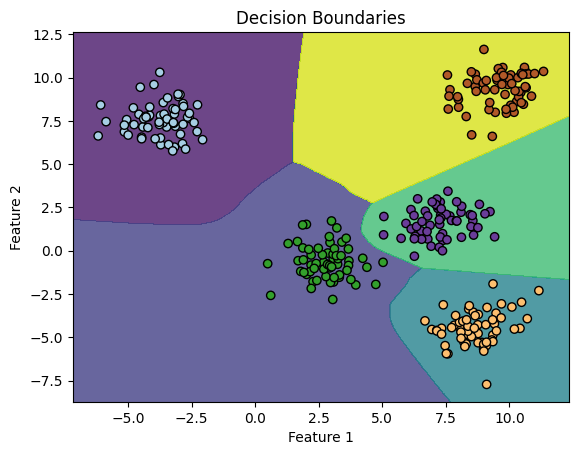

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


# Convert the meshgrid to a PyTorch tensor
X_grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Make predictions on the meshgrid
with torch.no_grad():
    model.eval()
    Z = model(X_grid)
    _, predicted = torch.max(Z.data, 1)
    Z = predicted.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')s
plt.title('Decision Boundaries')
plt.show()